<a href="https://colab.research.google.com/github/nondeterministicNilu/Niladri/blob/master/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd

In [95]:
df=pd.read_csv('/content/Train.csv')

In [96]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [97]:
col=df.columns
for j in col:
  n=df[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		17.165317376510618 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		28.27642848762173 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %
Item_Outlet_Sales		0.0 %


In [98]:
df1=df[df['Item_Weight'].isnull()==False]
m=df1['Item_Weight'].mean()
m

12.857645184136183

In [99]:
def replaceByMean(a):
  if a>4:
    return a
  else:
    return 12.857645184136183

df['Item_Weight']=df['Item_Weight'].apply(replaceByMean)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
col=df.columns
for j in col:
  n=df[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		0.0 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		28.27642848762173 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %
Item_Outlet_Sales		0.0 %


In [101]:
s=set(list(df['Outlet_Size']))
s

{'High', 'Medium', 'Small', nan}

In [102]:
df01=df[df['Outlet_Size']=='High']
s01=set(list(df01['Outlet_Establishment_Year']))

df02=df[df['Outlet_Size']=='Medium']
s02=set(list(df02['Outlet_Establishment_Year']))

df03=df[df['Outlet_Size']=='Small']
s03=set(list(df03['Outlet_Establishment_Year']))

print(s01,s02,s03)

{1987} {2009, 1985, 1999} {1985, 2004, 1997}


In [103]:
df04=df[df['Outlet_Size'].isnull()==True]
s04=set(list(df04['Outlet_Establishment_Year']))

s04

{1998, 2002, 2007}

## So, here I'm gonna estimate the **Outlet_Size** by oberving the tendency of the same with respect to **Outlet_Establishment_Year**. For each year with a blank outlet size I'm taking the size of the nearest year. Like: 1998 --> randomly thaking both Medium(1999) and Small(1997); 2002 --> Small(2004); 2007 --> Medium(2007);


In [104]:
dic={1998:('Medium','Small'),2002:'Small',2007:'Medium'}

In [105]:
j=0;
for i in list(df['Outlet_Establishment_Year']):
  if i==1998:
    import random
    f=random.randint(0,1)
    df['Outlet_Size'].iloc[j]=dic[1998][f]
  elif i==2002:
    df['Outlet_Size'].iloc[j]=dic[2002]
  elif i==2007:
    df['Outlet_Size'].iloc[j]=dic[2007]
  else:
    a=0
  j+=1

df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
col=df.columns
for j in col:
  n=df[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		0.0 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		0.0 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %
Item_Outlet_Sales		0.0 %


In [107]:
df01=df[df['Outlet_Size']=='High']
s01=set(list(df01['Outlet_Establishment_Year']))

df02=df[df['Outlet_Size']=='Medium']
s02=set(list(df02['Outlet_Establishment_Year']))

df03=df[df['Outlet_Size']=='Small']
s03=set(list(df03['Outlet_Establishment_Year']))

print(s01,s02,s03)

{1987} {1985, 1998, 1999, 2007, 2009} {1985, 1997, 1998, 2002, 2004}


In [108]:
df12=df02[df02['Outlet_Establishment_Year']==1998]
df13=df03[df03['Outlet_Establishment_Year']==1998]
print(len(df12),len(df13))

272 283


In [109]:
print(len(df),len(set(list(df['Item_Identifier']))),len(set(list(df['Outlet_Identifier']))))

8523 1559 10


In [110]:
s=set(list(df['Outlet_Establishment_Year']))
for x in s:
  dfs=df[df['Outlet_Establishment_Year']==x]
  print(x,set(list(dfs['Outlet_Identifier'])))

1985 {'OUT027', 'OUT019'}
1987 {'OUT013'}
1997 {'OUT046'}
1998 {'OUT010'}
1999 {'OUT049'}
2002 {'OUT045'}
2004 {'OUT035'}
2007 {'OUT017'}
2009 {'OUT018'}


In [111]:
s=set(list(df['Outlet_Identifier']))
for x in s:
  dfs=df[df['Outlet_Identifier']==x]
  print(x,set(list(dfs['Outlet_Establishment_Year'])),set(list(dfs['Outlet_Size'])))

OUT045 {2002} {'Small'}
OUT010 {1998} {'Medium', 'Small'}
OUT019 {1985} {'Small'}
OUT049 {1999} {'Medium'}
OUT018 {2009} {'Medium'}
OUT027 {1985} {'Medium'}
OUT046 {1997} {'Small'}
OUT013 {1987} {'High'}
OUT017 {2007} {'Medium'}
OUT035 {2004} {'Small'}


#  We can see that we can tell about the year by knowing about the Outlet_Identifier. So the year can't give us any additional info. So, we gonna drop year. Also, we'll drop the Item_Identifier as it isn't a useful varient for analysis

In [112]:
set(list(df['Item_Fat_Content']))

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [113]:
def encode(a):
  if a=='LF' or a=='Low Fat' or a=='low fat':
    return 0
  else:
    return 1

df['Item_Fat_Content']=df['Item_Fat_Content'].apply(encode)

In [114]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
set(list(df['Item_Type']))

{'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods'}

In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,4]=le.fit_transform(df.iloc[:,4])
df.iloc[:,6]=le.fit_transform(df.iloc[:,6])
df.iloc[:,8]=le.fit_transform(df.iloc[:,8])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,Tier 3,Supermarket Type1,994.7052


In [117]:
set(list(df['Outlet_Location_Type']))

{'Tier 1', 'Tier 2', 'Tier 3'}

In [118]:
df.iloc[:,9]=le.fit_transform(df.iloc[:,9])
df.iloc[:,10]=le.fit_transform(df.iloc[:,10])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [119]:
col=df.columns

In [120]:
col

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [121]:
col1=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [122]:
X=df[col1]
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,9,1,0,1
1,5.92,1,0.019278,14,48.2692,3,1,2,2
2,17.50,0,0.016760,10,141.6180,9,1,0,1
3,19.20,1,0.000000,6,182.0950,0,2,2,0
4,8.93,0,0.000000,9,53.8614,1,0,2,1


In [123]:
y=df['Item_Outlet_Sales']
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [124]:
from sklearn import metrics 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)
print(len(X_train),len(X_test))

6392 2131


In [125]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
reg.coef_

array([ 1.02742166e+00,  6.99035150e+01, -1.37967298e+03,  2.36023174e-01,
        1.54386058e+01,  1.10239041e+02, -3.19699531e+02, -8.78328394e+00,
        7.36555680e+02])

In [127]:
reg.intercept_

-926.0485295333083

In [128]:
y_pred = reg.predict(X_test)

In [129]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

In [130]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [131]:
print(r2,rmse)

0.5366423959826938 1159.0828389762517


In [132]:
y_test

4258    2865.6032
2574    2607.2728
517      372.8480
3004     850.8924
2159     164.4526
          ...    
2415    2082.6224
7330    2285.0256
3521    4649.9472
5710    2013.3792
7587    1731.7458
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [133]:
y_pred

array([2576.72338463, 1543.57556142, 1252.69984819, ..., 4530.1661168 ,
       2535.05323978, 1446.61792084])

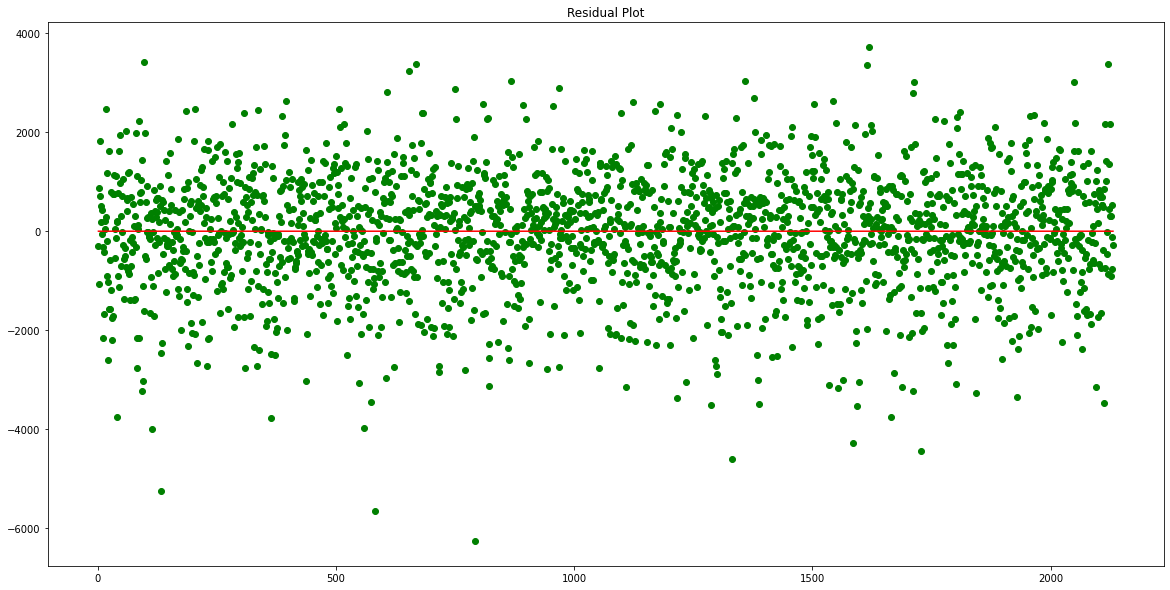

In [134]:
import matplotlib.pyplot as plt

x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

In [135]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [136]:
col=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [137]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame()  
for x in col:
    for y in col:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [138]:
df_corr

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014790,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001858,-0.001598,0.002199,0.018719
Item_Visibility,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.081978,-0.028099,-0.173468,-0.128625
Item_Type,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,0.001279,0.003084,0.003053,0.017048
Item_MRP,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.002436,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.508888,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.259687,-0.089216,-0.122304,-0.049135
Outlet_Size,-0.014790,-0.001858,0.081978,0.001279,0.002436,0.508888,0.259687,1.000000,-0.527881,-0.301505,-0.132208
Outlet_Location_Type,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.527881,1.000000,0.467219,0.089367
Outlet_Type,-0.000566,0.002199,-0.173468,0.003053,-0.001975,0.099873,-0.122304,-0.301505,0.467219,1.000000,0.401522


In [139]:
df_p

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,0.000000,5.079862e-02,2.660528e-01,9.696391e-03,0.022283,4.616492e-01,4.435366e-01,1.721602e-01,7.059361e-01,9.583299e-01,2.863439e-01
Item_Fat_Content,0.050799,0.000000e+00,1.243190e-05,2.896623e-38,0.575718,9.437981e-01,7.711832e-01,8.638006e-01,8.826980e-01,8.391482e-01,8.398917e-02
Item_Visibility,0.266053,1.243190e-05,0.000000e+00,1.135085e-03,0.903399,1.476219e-20,4.602571e-12,3.459116e-14,9.479704e-03,1.455321e-58,9.041287e-33
Item_Type,0.009696,2.896623e-38,1.135085e-03,0.000000e+00,0.002572,8.785188e-01,6.463901e-01,9.060422e-01,7.758829e-01,7.780796e-01,1.155508e-01
Item_MRP,0.022283,5.757179e-01,9.033987e-01,2.572498e-03,0.000000,7.593005e-01,6.430963e-01,8.221111e-01,9.828994e-01,8.553705e-01,0.000000e+00
Outlet_Identifier,0.461649,9.437981e-01,1.476219e-20,8.785188e-01,0.759301,0.000000e+00,2.734663e-13,0.000000e+00,0.000000e+00,2.417746e-20,2.070364e-51
Outlet_Establishment_Year,0.443537,7.711832e-01,4.602571e-12,6.463901e-01,0.643096,2.734663e-13,0.000000e+00,2.162606e-131,1.561361e-16,9.106109e-30,5.673082e-06
Outlet_Size,0.172160,8.638006e-01,3.459116e-14,9.060422e-01,0.822111,0.000000e+00,2.162606e-131,0.000000e+00,0.000000e+00,1.290890e-178,1.531116e-34
Outlet_Location_Type,0.705936,8.826980e-01,9.479704e-03,7.758829e-01,0.982899,0.000000e+00,1.561361e-16,0.000000e+00,0.000000e+00,0.000000e+00,1.389024e-16
Outlet_Type,0.958330,8.391482e-01,1.455321e-58,7.780796e-01,0.855370,2.417746e-20,9.106109e-30,1.290890e-178,0.000000e+00,0.000000e+00,0.000000e+00


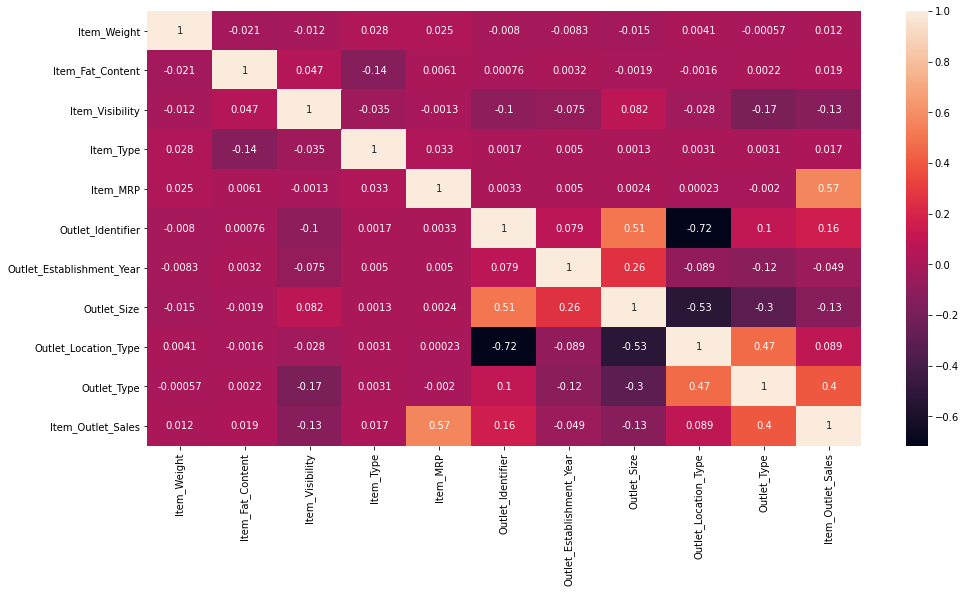

In [140]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

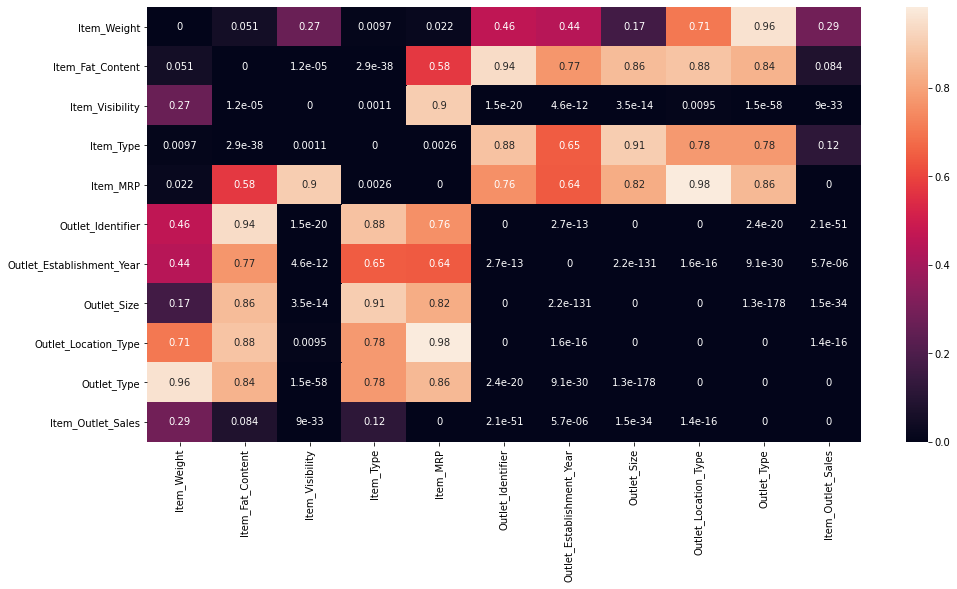

In [141]:
plt.figure(figsize=(16,8))
sns.heatmap(df_p,annot=True)

In [142]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfv=df[col]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfv.values, i) for i in range(dfv.shape[1])]
vif["features"] = dfv.columns

In [143]:
vif

,VIF Factor,features
0,10.275455,Item_Weight
1,1.580190,Item_Fat_Content
2,2.788318,Item_Visibility
3,4.035634,Item_Type
4,10.174806,Item_MRP
5,18.419550,Outlet_Identifier
6,47.049642,Outlet_Establishment_Year
7,8.389168,Outlet_Size
8,14.975935,Outlet_Location_Type
9,10.174167,Outlet_Type


# **So Dropping Year was a good decision**

In [144]:
col=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [145]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame()  
for x in col:
    for y in col:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

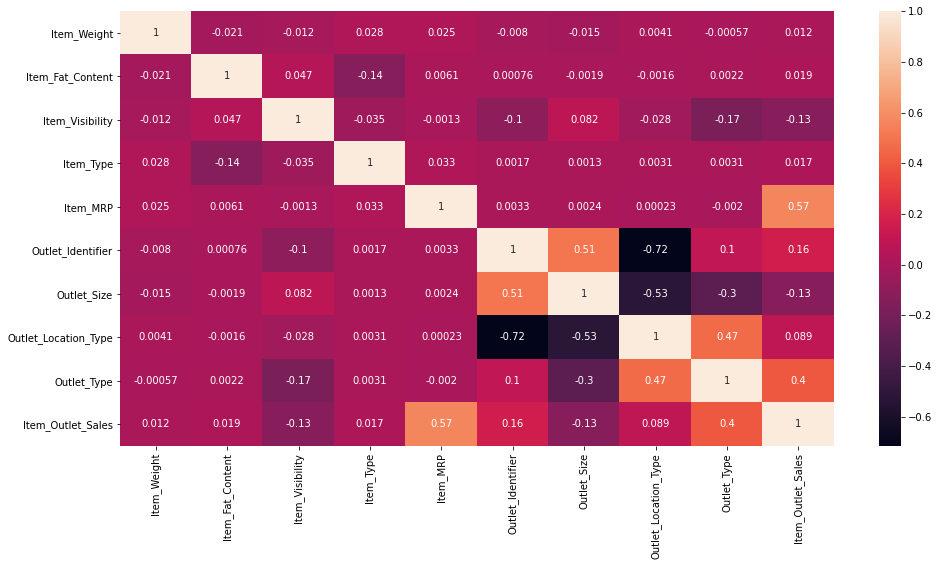

In [146]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

In [147]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfv=df[col]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfv.values, i) for i in range(dfv.shape[1])]
vif["features"] = dfv.columns
vif

,VIF Factor,features
0,8.265310,Item_Weight
1,1.548286,Item_Fat_Content
2,2.630537,Item_Visibility
3,3.786159,Item_Type
4,9.240466,Item_MRP
5,13.462551,Outlet_Identifier
6,7.970416,Outlet_Size
7,9.759260,Outlet_Location_Type
8,9.801746,Outlet_Type
9,5.322101,Item_Outlet_Sales


# Now gonna delete Outlet_identifier

In [148]:
col=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

In [149]:
from scipy import stats
df_corr = pd.DataFrame()
df_p = pd.DataFrame()  
for x in col:
    for y in col:
        corr = stats.pearsonr(df[x], df[y])
        df_corr.loc[x,y] = corr[0]
        df_p.loc[x,y] = corr[1]

In [150]:
df_p

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,0.000000,5.079862e-02,2.660528e-01,9.696391e-03,0.022283,1.721602e-01,7.059361e-01,9.583299e-01,2.863439e-01
Item_Fat_Content,0.050799,0.000000e+00,1.243190e-05,2.896623e-38,0.575718,8.638006e-01,8.826980e-01,8.391482e-01,8.398917e-02
Item_Visibility,0.266053,1.243190e-05,0.000000e+00,1.135085e-03,0.903399,3.459116e-14,9.479704e-03,1.455321e-58,9.041287e-33
Item_Type,0.009696,2.896623e-38,1.135085e-03,0.000000e+00,0.002572,9.060422e-01,7.758829e-01,7.780796e-01,1.155508e-01
Item_MRP,0.022283,5.757179e-01,9.033987e-01,2.572498e-03,0.000000,8.221111e-01,9.828994e-01,8.553705e-01,0.000000e+00
Outlet_Size,0.172160,8.638006e-01,3.459116e-14,9.060422e-01,0.822111,0.000000e+00,0.000000e+00,1.290890e-178,1.531116e-34
Outlet_Location_Type,0.705936,8.826980e-01,9.479704e-03,7.758829e-01,0.982899,0.000000e+00,0.000000e+00,0.000000e+00,1.389024e-16
Outlet_Type,0.958330,8.391482e-01,1.455321e-58,7.780796e-01,0.855370,1.290890e-178,0.000000e+00,0.000000e+00,0.000000e+00
Item_Outlet_Sales,0.286344,8.398917e-02,9.041287e-33,1.155508e-01,0.000000,1.531116e-34,1.389024e-16,0.000000e+00,0.000000e+00


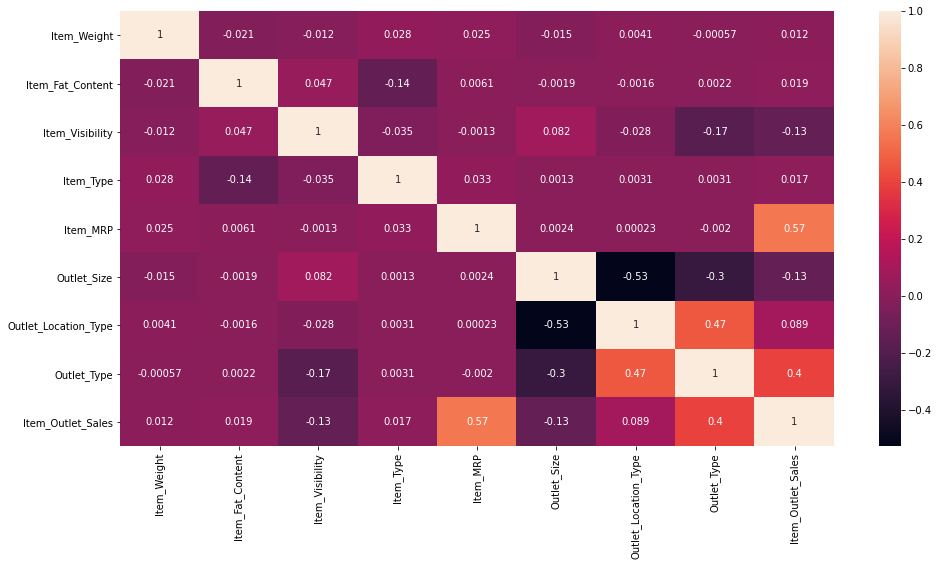

In [151]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(df_corr,annot=True)

In [152]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfv=df[col]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfv.values, i) for i in range(dfv.shape[1])]
vif["features"] = dfv.columns
vif

,VIF Factor,features
0,7.541987,Item_Weight
1,1.536829,Item_Fat_Content
2,2.626099,Item_Visibility
3,3.691799,Item_Type
4,9.115995,Item_MRP
5,4.973141,Outlet_Size
6,4.306619,Outlet_Location_Type
7,5.324793,Outlet_Type
8,5.299211,Item_Outlet_Sales


In [153]:
col1=['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [154]:
X_train1=X_train[col1]
X_test1=X_test[col1]

In [155]:
reg.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
reg.coef_

array([ 6.28370420e-01,  6.99122510e+01, -1.69407859e+03,  1.68908528e-01,
        1.54438158e+01, -2.10587299e+02, -3.39696142e+02,  9.57905743e+02])

In [157]:
reg.intercept_

-420.15257341915185

In [158]:
y_pred1 = reg.predict(X_test1)

In [159]:
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [160]:
print(r2,rmse)

0.5366423959826938 1159.0828389762517


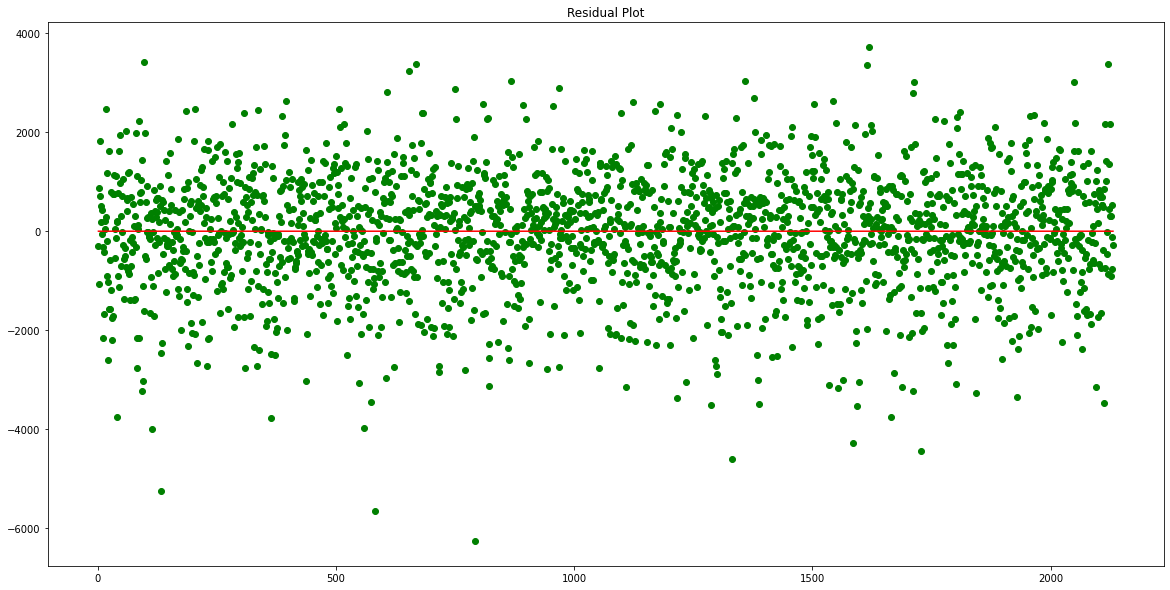

In [161]:
import matplotlib.pyplot as plt

x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred-y_test),c='g')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

# So we see that there isn't any improvemrnt in R2 Score after elemination of some coefficients using VIF. Now we'll go for the Regularization

In [162]:
col1

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [163]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [164]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [165]:
col1

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [166]:
X_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
774,12.857645,0,0.014560,0,81.4250,5,1,2,3
6624,12.600000,0,0.083222,9,174.5054,2,1,1,1
7081,12.857645,1,0.205484,0,198.0110,4,2,0,0
414,15.700000,0,0.160663,9,59.4562,8,2,0,1
7682,5.785000,1,0.064871,6,262.1252,0,2,2,0
...,...,...,...,...,...,...,...,...,...
7161,12.857645,0,0.032610,9,37.4822,5,1,2,3
2707,8.935000,0,0.040410,5,52.9298,2,1,1,1
6400,16.350000,0,0.034393,6,50.8324,0,1,2,0
1688,12.857645,1,0.121044,0,59.4220,5,1,2,3


# ***Regularization***

In [167]:
predictors=X_train.columns
predictors

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [168]:
reg.fit(X_train,y_train)
coef=pd.Series(reg.coef_,predictors).sort_values()
coef

Item_Visibility        -1379.672985
Outlet_Size             -319.699531
Outlet_Location_Type      -8.783284
Item_Type                  0.236023
Item_Weight                1.027422
Item_MRP                  15.438606
Item_Fat_Content          69.903515
Outlet_Identifier        110.239041
Outlet_Type              736.555680
dtype: float64

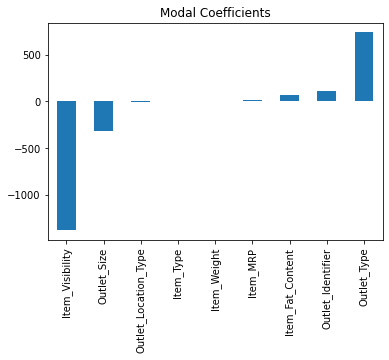

In [169]:
coef.plot(kind='bar',title='Modal Coefficients')

In [170]:
from sklearn.linear_model import Ridge

In [171]:
ridgeReg = Ridge(alpha=0.05,normalize=True)
ridgeReg.fit(X_train,y_train)
y_pred_rig=ridgeReg.predict(X_test)

In [172]:
ridgeReg.coef_

array([ 1.33706013e+00,  6.77991170e+01, -1.43772936e+03,  4.60238121e-01,
        1.46997766e+01,  1.06949340e+02, -2.98707468e+02,  7.98489586e+00,
        6.98895721e+02])

In [173]:
ridgeReg.intercept_

-807.8983058797571

In [174]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rig))
r2=r2_score(y_test,y_pred_rig)
print(r2,rmse)

0.5348358457937559 1161.3401714285305


In [175]:
dfn=pd.DataFrame(columns=['Linear Reg','Ridge Reg'])
for i in range(len(ridgeReg.coef_)):
  dfn=df.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeReg.coef_[i]},ignore_index=True)
dfn

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Linear Reg,Ridge Reg
0,FDA15,9.30,0.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0,3735.1380,NaN,NaN
1,DRC01,5.92,1.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0,443.4228,NaN,NaN
2,FDN15,17.50,0.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0,2097.2700,NaN,NaN
3,FDX07,19.20,1.0,0.000000,6.0,182.0950,0.0,1998.0,2.0,2.0,0.0,732.3800,NaN,NaN
4,NCD19,8.93,0.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0,994.7052,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,FDS36,8.38,1.0,0.046982,0.0,108.1570,7.0,2002.0,2.0,1.0,1.0,549.2850,NaN,NaN
8520,NCJ29,10.60,0.0,0.035186,8.0,85.1224,6.0,2004.0,2.0,1.0,1.0,1193.1136,NaN,NaN
8521,FDN46,7.21,1.0,0.145221,13.0,103.1332,3.0,2009.0,1.0,2.0,2.0,1845.5976,NaN,NaN
8522,DRG01,14.80,0.0,0.044878,14.0,75.4670,8.0,1997.0,2.0,0.0,1.0,765.6700,NaN,NaN


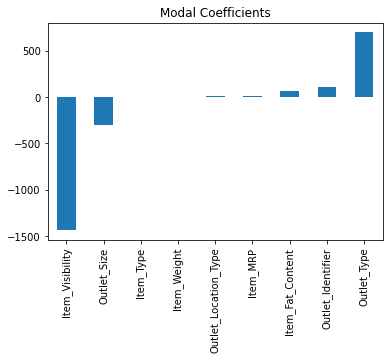

In [176]:
coef=pd.Series(ridgeReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

It has done a very little improvement

In [220]:
from sklearn.linear_model import  Lasso
lassoReg=Lasso(alpha=0.01, normalize=True)
lassoReg.fit(X_train,y_train)
y_pred_lso=lassoReg.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_lso))
r2=r2_score(y_test,y_pred_lso)
print(r2,rmse)

0.536652247161606 1159.0705176147244


In [178]:
dfm=pd.DataFrame(columns=['Linear Reg','Ridge Reg','Lasso Reg'])
for i in range(len(ridgeReg.coef_)):
  dfm=dfm.append({'Linear Reg':reg.coef_[i],'Ridge Reg':ridgeReg.coef_[i],'Lasso Reg':lassoReg.coef_[i]},ignore_index=True)
dfm

,Linear Reg,Ridge Reg,Lasso Reg
0,1.027422,1.337060,0.855797
1,69.903515,67.799117,67.947971
2,-1379.672985,-1437.729364,-1368.473028
3,0.236023,0.460238,0.027373
4,15.438606,14.699777,15.426389
5,110.239041,106.949340,110.634032
6,-319.699531,-298.707468,-317.710160
7,-8.783284,7.984896,-4.819855
8,736.555680,698.895721,734.132477


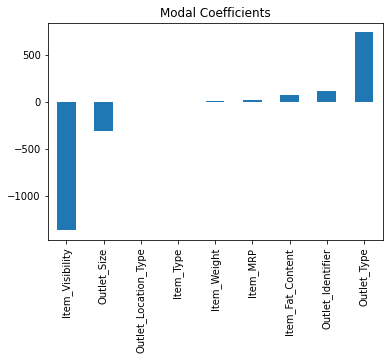

In [179]:
coef=pd.Series(lassoReg.coef_,predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficients')

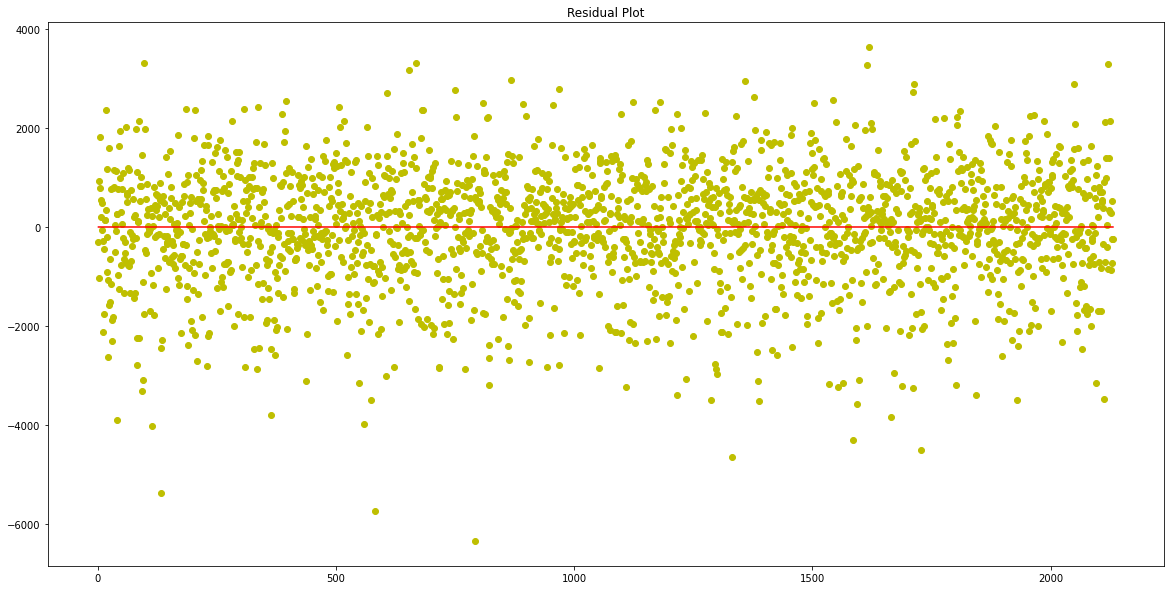

In [182]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_rig-y_test),c='y')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

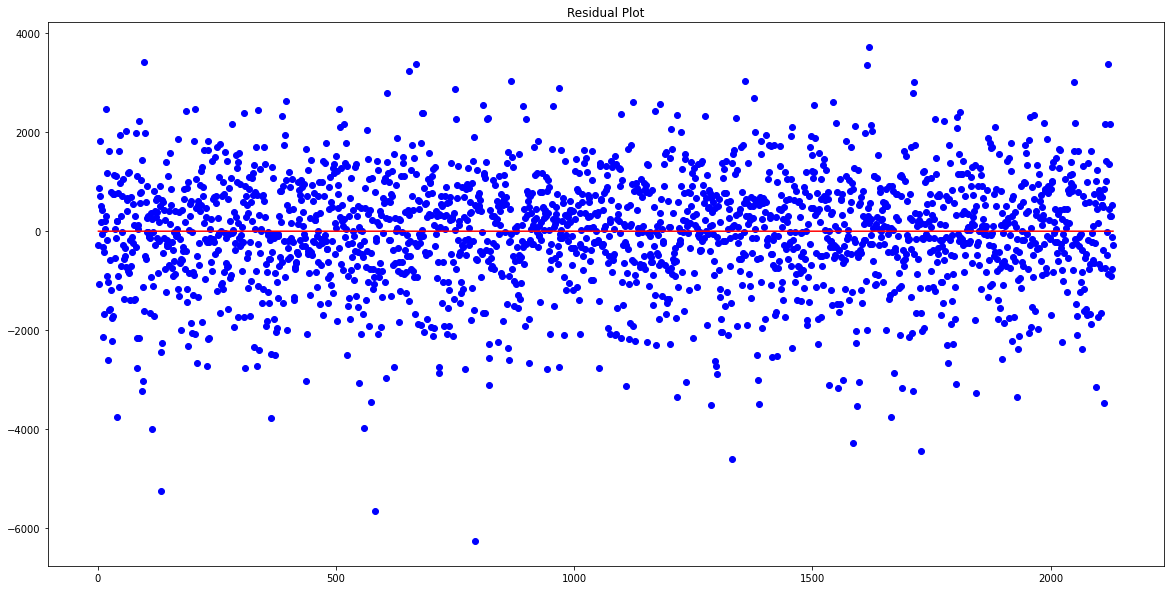

In [183]:
x=[i for i in range(1,len(y_pred)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_pred_lso-y_test),c='b')
plt.plot(x,[0]*len(y_pred),c='r')
plt.title("Residual Plot")
plt.show()

# ***So, the best model is the Lasso Regression***

In [184]:
df1=pd.read_csv('/content/Test.csv')

In [185]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [186]:
col=df1.columns
for j in col:
  n=df1[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df1)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		17.180073930646014 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		28.269670832599896 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %


In [187]:
s=set(list(df['Outlet_Identifier']))
for x in s:
  dfs=df[df['Outlet_Identifier']==x]
  print(x,set(list(dfs['Outlet_Establishment_Year'])),set(list(dfs['Outlet_Size'])))

0 {1998} {1, 2}
1 {1987} {0}
2 {2007} {1}
3 {2009} {1}
4 {1985} {2}
5 {1985} {1}
6 {2004} {2}
7 {2002} {2}
8 {1997} {2}
9 {1999} {1}


In [188]:
df11=df1[df1['Item_Weight'].isnull()==False]
m1=df11['Item_Weight'].mean()
m1

12.695633368756374

In [189]:
def replaceByMean(a):
  if a>4:
    return a
  else:
    return 12.857645184136183

df1['Item_Weight']=df1['Item_Weight'].apply(replaceByMean)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [190]:
col=df1.columns
for j in col:
  n=df1[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df1)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		0.0 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		28.269670832599896 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %


In [191]:
df01=df1[df1['Outlet_Size']=='High']
s01=set(list(df01['Outlet_Establishment_Year']))

df02=df1[df1['Outlet_Size']=='Medium']
s02=set(list(df02['Outlet_Establishment_Year']))

df03=df1[df1['Outlet_Size']=='Small']
s03=set(list(df03['Outlet_Establishment_Year']))

print(s01,s02,s03)

{1987} {1985, 2009, 1999} {1985, 2004, 1997}


In [192]:
df04=df1[df1['Outlet_Size'].isnull()==True]
s04=set(list(df04['Outlet_Establishment_Year']))

s04

{1998, 2002, 2007}

In [193]:
dic={1998:('Medium','Small'),2002:'Small',2007:'Medium'}

In [194]:
j=0;
for i in list(df1['Outlet_Establishment_Year']):
  if i==1998:
    import random
    f=random.randint(0,1)
    df1['Outlet_Size'].iloc[j]=dic[1998][f]
  elif i==2002:
    df1['Outlet_Size'].iloc[j]=dic[2002]
  elif i==2007:
    df1['Outlet_Size'].iloc[j]=dic[2007]
  else:
    a=0
  j+=1

df1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.857645,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [195]:
col=df1.columns
for j in col:
  n=df1[j].isnull().sum()
  print(j+"\t\t"+str(n/len(df1)*100)+" %")

Item_Identifier		0.0 %
Item_Weight		0.0 %
Item_Fat_Content		0.0 %
Item_Visibility		0.0 %
Item_Type		0.0 %
Item_MRP		0.0 %
Outlet_Identifier		0.0 %
Outlet_Establishment_Year		0.0 %
Outlet_Size		0.0 %
Outlet_Location_Type		0.0 %
Outlet_Type		0.0 %


In [196]:
df01=df1[df1['Outlet_Size']=='High']
s01=set(list(df01['Outlet_Establishment_Year']))

df02=df1[df1['Outlet_Size']=='Medium']
s02=set(list(df02['Outlet_Establishment_Year']))

df03=df1[df1['Outlet_Size']=='Small']
s03=set(list(df03['Outlet_Establishment_Year']))

print(s01,s02,s03)

{1987} {1985, 1998, 1999, 2007, 2009} {1985, 1997, 1998, 2002, 2004}


In [197]:
df12=df02[df02['Outlet_Establishment_Year']==1998]
df13=df03[df03['Outlet_Establishment_Year']==1998]
print(len(df12),len(df13))

200 170


In [198]:
print(len(df1),len(set(list(df1['Item_Identifier']))),len(set(list(df1['Outlet_Identifier']))))

5681 1543 10


In [199]:
s=set(list(df1['Outlet_Establishment_Year']))
for x in s:
  dfs=df1[df1['Outlet_Establishment_Year']==x]
  print(x,set(list(dfs['Outlet_Identifier'])))

1985 {'OUT027', 'OUT019'}
1987 {'OUT013'}
1997 {'OUT046'}
1998 {'OUT010'}
1999 {'OUT049'}
2002 {'OUT045'}
2004 {'OUT035'}
2007 {'OUT017'}
2009 {'OUT018'}


In [200]:
s=set(list(df1['Outlet_Identifier']))
for x in s:
  dfs=df1[df1['Outlet_Identifier']==x]
  print(x,set(list(dfs['Outlet_Establishment_Year'])),set(list(dfs['Outlet_Size'])))

OUT045 {2002} {'Small'}
OUT010 {1998} {'Medium', 'Small'}
OUT019 {1985} {'Small'}
OUT049 {1999} {'Medium'}
OUT018 {2009} {'Medium'}
OUT027 {1985} {'Medium'}
OUT046 {1997} {'Small'}
OUT017 {2007} {'Medium'}
OUT013 {1987} {'High'}
OUT035 {2004} {'Small'}


In [201]:
set(list(df1['Item_Fat_Content']))

{'LF', 'Low Fat', 'Regular', 'low fat', 'reg'}

In [202]:
def encode(a):
  if a=='LF' or a=='Low Fat' or a=='low fat':
    return 0
  else:
    return 1

df1['Item_Fat_Content']=df1['Item_Fat_Content'].apply(encode)

In [203]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,1,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,0,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.857645,1,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [204]:
df1.iloc[:,4]

0              Snack Foods
1                    Dairy
2                   Others
3              Snack Foods
4                    Dairy
               ...        
5676           Snack Foods
5677         Starchy Foods
5678    Health and Hygiene
5679                Canned
5680                Canned
Name: Item_Type, Length: 5681, dtype: object

In [205]:
df1.iloc[:,4]=le.fit_transform(df1.iloc[:,4])
df1.iloc[:,6]=le.fit_transform(df1.iloc[:,6])
df1.iloc[:,8]=le.fit_transform(df1.iloc[:,8])
df1.iloc[:,9]=le.fit_transform(df1.iloc[:,9])
df1.iloc[:,10]=le.fit_transform(df1.iloc[:,10])
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,FDY38,12.857645,1,0.118599,4,234.2300,5,1985,1,2,3


Linear Regression

In [206]:
col1=['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
dataToPredict=df1[col1]
predicted = reg.predict(dataToPredict)
predicted

array([2162.15127525, 1076.95596829, 2029.54326088, ..., 1677.95693115,
       3102.29492051, 1101.8296066 ])

Ridge Regression

In [207]:
predicted = ridgeReg.predict(dataToPredict)
predicted

array([2163.23515784, 1123.24414478, 2045.80533031, ..., 1707.06136277,
       3058.70288851, 1154.51879506])

Lasso Regression

In [208]:
predicted = lassoReg.predict(dataToPredict)
predicted

array([2157.16358579, 1075.82243446, 2034.20761154, ..., 1681.62612116,
       3098.18301334, 1105.49749333])

Automatic Feature selection Model

In [209]:
from sklearn.feature_selection import RFE

rfe = RFE(reg, 6)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True  True  True False  True]
[3 1 1 4 1 1 1 2 1]


In [210]:
y_Prdct=rfe.predict(X_test)

In [211]:
from sklearn.metrics import r2_score
R2=r2_score(y_test,y_pred)

In [212]:
from sklearn.metrics import mean_squared_error
Rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [213]:
print(R2,rmse)

0.5366423959826938 1159.0705176147244


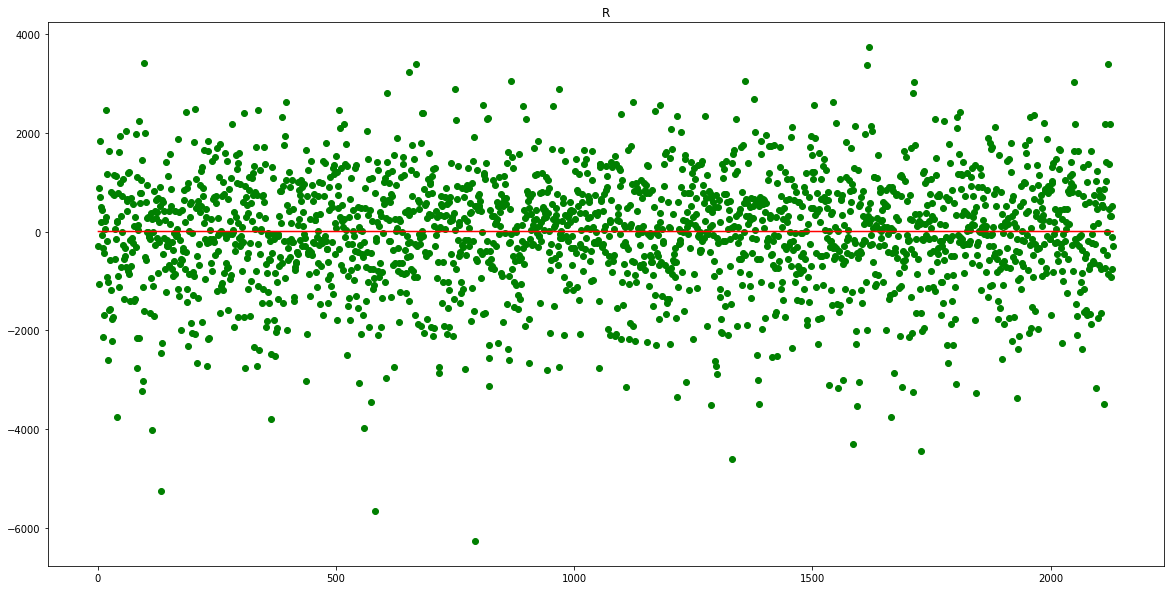

In [214]:
import matplotlib.pyplot as plt

x=[i for i in range(1,len(y_Prdct)+1)]

fig= plt.figure(figsize=(20,10))
x_plot=plt.scatter(x,(y_Prdct-y_test),c='g')
plt.plot(x,[0]*len(y_Prdct),c='r')
plt.title("R")
plt.show()